In [4]:
#import libraries
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

#### Read humn_genome_full fasta sequence file

In [7]:
file = open("Human_genomes/human_genome_full.fa")
lines = file.readlines()

KeyboardInterrupt: 

#### Import convergent transcript region positions from previous analysis

In [4]:
co_expression_data = pd.read_csv('all_valid_coexpression.csv')
co_expression_data

,chr_id,gene_A,gene_B,strand_a,strand_b,overlap_start,overlap_end,overlap_length,coexpression_score,combined,confidence_class
0,chr7,C9JW74,Q9UBF2,+,-,130506238,130506288,50,0.065,"('C9JW74', 'Q9UBF2')",VERY_LOW
1,chr17,Q15334,Q13045,+,-,18244815,18244875,60,0.076,"('Q13045', 'Q15334')",VERY_LOW
2,chr3,G3V115,A6NIV6,-,+,169812870,169812932,62,0.108,"('G3V115', 'A6NIV6')",VERY_LOW
3,chr3,C9JBE7,C9JLC0,-,+,196568611,196568674,63,0.088,"('C9JLC0', 'C9JBE7')",VERY_LOW
4,chr6,Q6Q6R5,Q9Y694,-,+,43305472,43305538,66,0.097,"('Q9Y694', 'Q6Q6R5')",VERY_LOW
...,...,...,...,...,...,...,...,...,...,...,...
1014,chr6,P35372,Q8WWN9,+,-,154154496,154246867,92371,0.062,"('Q8WWN9', 'P35372')",VERY_LOW
1015,chr5,E5RFJ0,A6NMK8,+,-,169861303,169980495,119192,0.063,"('A6NMK8', 'E5RFJ0')",VERY_LOW
1016,chr5,Q92608,A6NMK8,+,-,169861303,169980495,119192,0.063,"('A6NMK8', 'Q92608')",VERY_LOW
1017,chr4,Q8NEC7,D6R9W3,+,-,105708784,105847725,138941,0.056,"('D6R9W3', 'Q8NEC7')",VERY_LOW


In [5]:
filtered_coexp_data = co_expression_data[(co_expression_data['confidence_class'] =='HIGH') | (co_expression_data['confidence_class'] =='VERY_HIGH') 
| (co_expression_data['confidence_class'] =='MEDIUM')]
filtered_coexp_data

,chr_id,gene_A,gene_B,strand_a,strand_b,overlap_start,overlap_end,overlap_length,coexpression_score,combined,confidence_class
10,chr2,B8ZZ54,E7ESH4,+,-,197500140,197500208,68,0.963,"('E7ESH4', 'B8ZZ54')",VERY_HIGH
60,chr17,Q96FM1,P04626,-,+,39687914,39688057,143,0.778,"('P04626', 'Q96FM1')",HIGH
62,chr17,P04626,J3QKU0,+,-,39687914,39688057,143,0.778,"('P04626', 'J3QKU0')",HIGH
89,chr2,Q5EBM0,C9J674,-,+,6865727,6865907,180,0.908,"('Q5EBM0', 'C9J674')",VERY_HIGH
95,chr11,E9PS12,A8KAH6,-,+,111912736,111912927,191,0.457,"('E9PS12', 'A8KAH6')",MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...
908,chr11,C9JJB3,O95864,-,+,61816256,61829318,13062,0.652,"('C9JJB3', 'O95864')",MEDIUM
914,chr16,Q9NRP2,Q96H22,-,+,81006552,81020270,13718,0.545,"('Q9NRP2', 'Q96H22')",MEDIUM
933,chr2,P10809,S4R3N1,-,+,197500413,197516737,16324,0.772,"('P10809', 'S4R3N1')",HIGH
935,chr19,M0QZT0,M0QZ89,-,+,51752026,51768923,16897,0.684,"('M0QZ89', 'M0QZT0')",MEDIUM


In [6]:
#extract window
def extract_list_of_sequences(fasta,chromosome,start,end,window_length):
    list_sequences = []
    seq = ''
    for record in SeqIO.parse(fasta,"fasta"):
        if(chromosome in record.description):
            seq = str(record.seq[start:end])
            print(record)
            break
    for i in range(0,len(seq)-window_length):
        seq1 = seq[i:i+window_length]
        seq1_c =str(Seq(seq[i:i+window_length]).reverse_complement())
        list_sequences.append((seq1,seq1_c,start+i, start+i+window_length))
    return list_sequences

In [7]:
def get_gc_percent(forward_strand,reverse_strand):
    total_nt = len(forward_strand) + len(reverse_strand)
    gc_count = 0
    for chr in list(forward_strand):
        if(chr=='g' or chr=='c'):
            gc_count = gc_count + 1
    for chr in list(reverse_strand):
            if(chr=='g' or chr=='c'):
                gc_count = gc_count + 1
    # print(float(gc_count/total_nt)*100.0)
    return (float(gc_count/total_nt)*100.0)

In [8]:
fasta = "Human_genomes/human_genome_full.fasta"
win_len = 21 #24
forward_strand = []
reverse_strand = []
chrid = []
gene_A = []
gene_B = []
coexpression_score = []
confidence_class = []
overlap_length = []
gc_percent = []
seq_start = []
seq_end = []
for idx,row in filtered_coexp_data.iterrows():
    L = extract_list_of_sequences(fasta,row['chr_id'],row['overlap_start'],row['overlap_end'],win_len)
    for item in L:
        forward_strand.append(item[0].upper())
        reverse_strand.append(item[1].upper())
        seq_start.append(item[2])
        seq_end.append(item[3])
        gc_percent.append(get_gc_percent(item[0],item[1]))
        chrid.append(row['chr_id'])
        gene_A.append(row['gene_A'])
        gene_B.append(row['gene_B'])
        coexpression_score.append(row['coexpression_score'])
        confidence_class.append(row['confidence_class'])
        overlap_length.append(row['overlap_length'])
    
    print("DONE-------------->",row['chr_id'],row['gene_A'],row['gene_B'])


    

DONE--------------> chr2 B8ZZ54 E7ESH4
ID: NC_000017.11
Name: NC_000017.11
Description: NC_000017.11 Homo sapiens chr17, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
DONE--------------> chr17 Q96FM1 P04626
ID: NC_000017.11
Name: NC_000017.11
Description: NC_000017.11 Homo sapiens chr17, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
DONE--------------> chr17 P04626 J3QKU0
DONE--------------> chr2 Q5EBM0 C9J674
ID: NC_000011.10
Name: NC_000011.10
Description: NC_000011.10 Homo sapiens chr11, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
DONE--------------> chr11 E9PS12 A8KAH6
ID: NC_000011.10
Name: NC_000011.10
Description: NC_000011.10 Homo sapiens chr11, GRCh38.p14 Primary Assembly
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')
DO

In [9]:
table_of_extracted_duplex = pd.DataFrame({'Forward_strand':forward_strand,'Reverse_strand':reverse_strand,'gc_percent':gc_percent,\
             'chr_id':chrid,'gene_A':gene_A,'gene_B':gene_B,'seq_start':seq_start, 'seq_end':seq_end, 'coexpression_score':coexpression_score,\
             'confidence_class':confidence_class,'overlap_length':overlap_length})
        

table_of_extracted_duplex

,Forward_strand,Reverse_strand,gc_percent,chr_id,gene_A,gene_B,seq_start,seq_end,coexpression_score,confidence_class,overlap_length
0,GTACGCAGTCGCGGTACACCG,CGGTGTACCGCGACTGCGTAC,0.000000,chr17,Q96FM1,P04626,39687914,39687935,0.778,HIGH,143
1,TACGCAGTCGCGGTACACCGG,CCGGTGTACCGCGACTGCGTA,0.000000,chr17,Q96FM1,P04626,39687915,39687936,0.778,HIGH,143
2,ACGCAGTCGCGGTACACCGGC,GCCGGTGTACCGCGACTGCGT,0.000000,chr17,Q96FM1,P04626,39687916,39687937,0.778,HIGH,143
3,CGCAGTCGCGGTACACCGGCT,AGCCGGTGTACCGCGACTGCG,0.000000,chr17,Q96FM1,P04626,39687917,39687938,0.778,HIGH,143
4,GCAGTCGCGGTACACCGGCTC,GAGCCGGTGTACCGCGACTGC,0.000000,chr17,Q96FM1,P04626,39687918,39687939,0.778,HIGH,143
...,...,...,...,...,...,...,...,...,...,...,...
233745,CGCGGCGGCTGCGGCGGCGGC,GCCGCCGCCGCAGCCGCCGCG,85.714286,chr17,A6ND36,A0PJK1,19004738,19004759,0.629,MEDIUM,35975
233746,GCGGCGGCTGCGGCGGCGGCG,CGCCGCCGCCGCAGCCGCCGC,90.476190,chr17,A6ND36,A0PJK1,19004739,19004760,0.629,MEDIUM,35975
233747,CGGCGGCTGCGGCGGCGGCGC,GCGCCGCCGCCGCAGCCGCCG,90.476190,chr17,A6ND36,A0PJK1,19004740,19004761,0.629,MEDIUM,35975
233748,GGCGGCTGCGGCGGCGGCGCG,CGCGCCGCCGCCGCAGCCGCC,85.714286,chr17,A6ND36,A0PJK1,19004741,19004762,0.629,MEDIUM,35975


In [10]:
table_of_extracted_duplex.to_csv("table_of_extracted_duplex_high.csv")

<Axes: xlabel='gc_percent', ylabel='Density'>

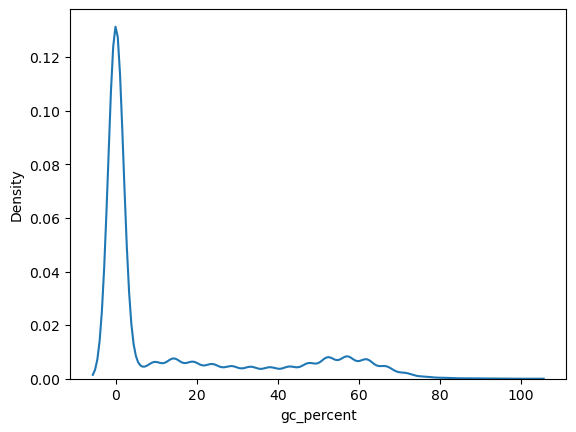

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(table_of_extracted_duplex['gc_percent'])

Text(0.5, 1.0, 'CO-EXPRESSION CONFIDENCE CLASS: HIGH')

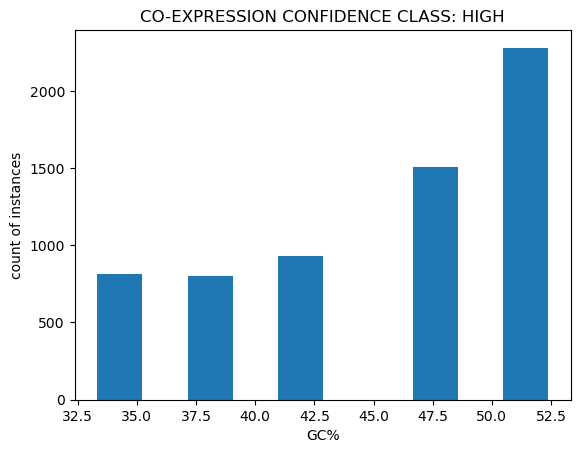

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
data = table_of_extracted_duplex[(table_of_extracted_duplex['gc_percent']>=30.0) & (table_of_extracted_duplex['gc_percent']<=55.0)]
data = data[data['confidence_class']=='HIGH']
data.to_csv("with_high_confidence_score_gc_sequences_dec_2025.csv")
# sns.kdeplot(data['gc_percent'])
plt.hist(data['gc_percent'])
plt.ylabel('count of instances')
plt.xlabel("GC%")
plt.title("CO-EXPRESSION CONFIDENCE CLASS: HIGH")

In [14]:
data

,Forward_strand,Reverse_strand,gc_percent,chr_id,gene_A,gene_B,seq_start,seq_end,coexpression_score,confidence_class,overlap_length
59303,TGTAACTATCCACTTCTCTCC,GGAGAGAAGTGGATAGTTACA,33.333333,chr17,J3QQL0,F5H1T4,39688331,39688352,0.778,HIGH,8678
59304,GTAACTATCCACTTCTCTCCA,TGGAGAGAAGTGGATAGTTAC,33.333333,chr17,J3QQL0,F5H1T4,39688332,39688353,0.778,HIGH,8678
59305,TAACTATCCACTTCTCTCCAT,ATGGAGAGAAGTGGATAGTTA,33.333333,chr17,J3QQL0,F5H1T4,39688333,39688354,0.778,HIGH,8678
59306,AACTATCCACTTCTCTCCATC,GATGGAGAGAAGTGGATAGTT,38.095238,chr17,J3QQL0,F5H1T4,39688334,39688355,0.778,HIGH,8678
59307,ACTATCCACTTCTCTCCATCT,AGATGGAGAGAAGTGGATAGT,38.095238,chr17,J3QQL0,F5H1T4,39688335,39688356,0.778,HIGH,8678
...,...,...,...,...,...,...,...,...,...,...,...
127980,CCCCCAGCCCTGCGGGGCCGA,TCGGCCCCGCAGGGCTGGGGG,52.380952,chr15,Q9BXS6,O43482,41332392,41332413,0.871,HIGH,11797
127981,CCCCAGCCCTGCGGGGCCGAG,CTCGGCCCCGCAGGGCTGGGG,47.619048,chr15,Q9BXS6,O43482,41332393,41332414,0.871,HIGH,11797
127982,CCCAGCCCTGCGGGGCCGAGC,GCTCGGCCCCGCAGGGCTGGG,42.857143,chr15,Q9BXS6,O43482,41332394,41332415,0.871,HIGH,11797
127983,CCAGCCCTGCGGGGCCGAGCG,CGCTCGGCCCCGCAGGGCTGG,38.095238,chr15,Q9BXS6,O43482,41332395,41332416,0.871,HIGH,11797


### Get the Forward_strand_sec_struc 	ΔGforward 	Reverse_strand_sec_struc 	Δgreverse 	Δgduplex 	Δganterior 	Δgmiddle 	Δgposterior 

### Duplexfold data aswell offline

### run RNAFold code to get the energy values

In [16]:
#plot data
import pandas as pd
data = pd.read_csv("with_high_confidence_score_gc_sequences_dec_2025_with_energy.csv")
data

,Unnamed: 0.1,Unnamed: 0,Forward_strand,Reverse_strand,gc_percent,chr_id,gene_A,gene_B,seq_start,seq_end,coexpression_score,confidence_class,overlap_length,Forward_strand_sec_struc,ΔGforward,Reverse_strand_sec_struc,Δgreverse
0,0,59303,TGTAACTATCCACTTCTCTCC,GGAGAGAAGTGGATAGTTACA,33.333333,chr17,J3QQL0,F5H1T4,39688331,39688352,0.778,HIGH,8678,.....................,0.0,.....................,0.0
1,1,59304,GTAACTATCCACTTCTCTCCA,TGGAGAGAAGTGGATAGTTAC,33.333333,chr17,J3QQL0,F5H1T4,39688332,39688353,0.778,HIGH,8678,.....................,0.0,.....................,0.0
2,2,59305,TAACTATCCACTTCTCTCCAT,ATGGAGAGAAGTGGATAGTTA,33.333333,chr17,J3QQL0,F5H1T4,39688333,39688354,0.778,HIGH,8678,.....................,0.0,.....................,0.0
3,3,59306,AACTATCCACTTCTCTCCATC,GATGGAGAGAAGTGGATAGTT,38.095238,chr17,J3QQL0,F5H1T4,39688334,39688355,0.778,HIGH,8678,.....................,0.0,.....................,0.0
4,4,59307,ACTATCCACTTCTCTCCATCT,AGATGGAGAGAAGTGGATAGT,38.095238,chr17,J3QQL0,F5H1T4,39688335,39688356,0.778,HIGH,8678,.....................,0.0,.....................,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,6318,127980,CCCCCAGCCCTGCGGGGCCGA,TCGGCCCCGCAGGGCTGGGGG,52.380952,chr15,Q9BXS6,O43482,41332392,41332413,0.871,HIGH,11797,.((((.((...))))))....,-7.2,(((((((....)))))))...,-10.7
6319,6319,127981,CCCCAGCCCTGCGGGGCCGAG,CTCGGCCCCGCAGGGCTGGGG,47.619048,chr15,Q9BXS6,O43482,41332393,41332414,0.871,HIGH,11797,((((.((...)))))).....,-6.9,((((((((....)))))))).,-13.8
6320,6320,127982,CCCAGCCCTGCGGGGCCGAGC,GCTCGGCCCCGCAGGGCTGGG,42.857143,chr15,Q9BXS6,O43482,41332394,41332415,0.871,HIGH,11797,....((((....)))).....,-6.4,.((((((((....)))))))),-12.7
6321,6321,127983,CCAGCCCTGCGGGGCCGAGCG,CGCTCGGCCCCGCAGGGCTGG,38.095238,chr15,Q9BXS6,O43482,41332395,41332416,0.871,HIGH,11797,...((((....))))......,-6.4,....((((((....)))))).,-10.4


In [17]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Forward_strand', 'Reverse_strand',
       'gc_percent', 'chr_id', 'gene_A', 'gene_B', 'seq_start', 'seq_end',
       'coexpression_score', 'confidence_class', 'overlap_length',
       'Forward_strand_sec_struc', 'ΔGforward', 'Reverse_strand_sec_struc',
       'Δgreverse '],
      dtype='object')

In [18]:
error_free_data = data[(data['Δganterior']!='error') & (data['Δgposterior']!='error')]
error_free_data['Δganterior'] = pd.to_numeric(error_free_data['Δganterior'])
error_free_data['Δgposterior'] = pd.to_numeric(error_free_data['Δgposterior'])
error_free_data.shape

KeyError: 'Δganterior'

In [4]:
duplexfold_error_data = data[(data['Δganterior']=='error') | (data['Δgposterior']=='error')]
duplexfold_error_data.shape

(4326, 18)

In [5]:
d2 = error_free_data[['Δganterior', 'Δgmiddle', 'Δgposterior']]

# d2.set_index('id',inplace=True)
# d2.reset_index()
d2['id'] = d2.index
d2.columns

/tmp/ipykernel_601594/4274701202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['id'] = d2.index


Index(['Δganterior', 'Δgmiddle', 'Δgposterior', 'id'], dtype='object')

/tmp/ipykernel_601594/1480150271.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # You can choose other colormaps like 'plasma', 'magma', etc.


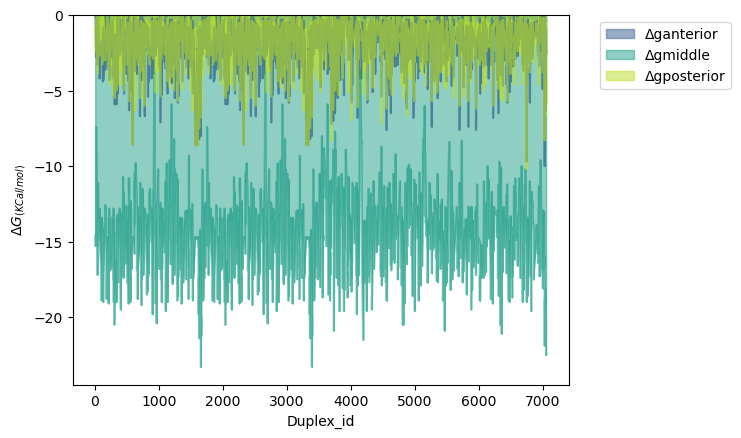

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Define a colormap
cmap = cm.get_cmap('viridis')  # You can choose other colormaps like 'plasma', 'magma', etc.

# Get colors from the colormap
colors = [cmap(i) for i in [0.3, 0.56, 0.9]] #adjust values to get different parts of the colormap

error_free_data[['Δganterior', 'Δgmiddle', 'Δgposterior']].plot.area(stacked=False,color=colors)
plt.xlabel('Duplex_id')
plt.ylabel(r'$ΔG_{(KCal/mol)}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

/tmp/ipykernel_601594/2556077632.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')  # You can choose other colormaps like 'plasma', 'magma', etc.


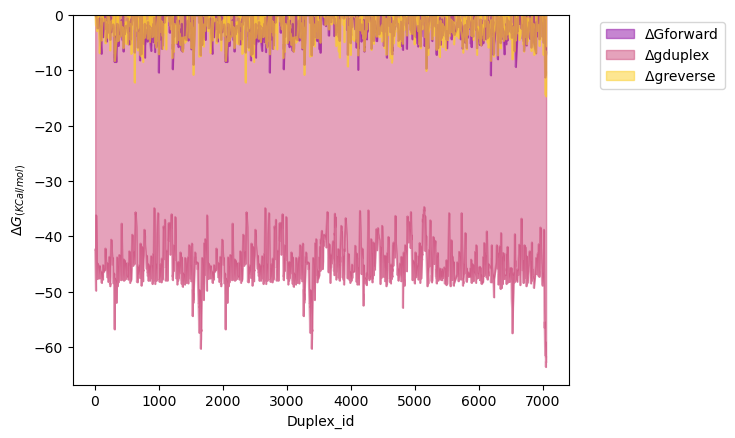

In [7]:
cmap = cm.get_cmap('plasma')  # You can choose other colormaps like 'plasma', 'magma', etc.

# Get colors from the colormap
colors = [cmap(i) for i in [0.3, 0.5, 0.9]] #adjust values to get different parts of the colormap

error_free_data[['ΔGforward', 'Δgduplex', 'Δgreverse ']].plot.area(stacked=False,color=colors)
plt.xlabel('Duplex_id')
plt.ylabel(r'$ΔG_{(KCal/mol)}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [8]:
error_free_data.columns

Index(['Forward_strand', 'Reverse_strand', 'gc_percent', 'chr_id', 'gene_A',
       'gene_B', 'coexpression_score', 'confidence_class', 'overlap_length',
       'Forward_strand_sec_struc', 'ΔGforward', 'Reverse_strand_sec_struc',
       'Δgreverse ', 'Δgduplex', 'Δganterior', 'Δgmiddle', 'Δgposterior',
       'Duplex-end'],
      dtype='object')

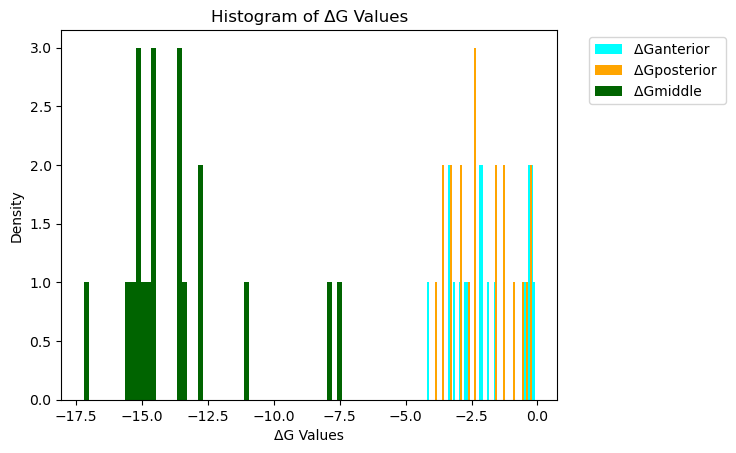

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(error_free_data[['Δganterior']][0:20],label='ΔGanterior ',color='cyan',bins=50)
plt.hist(error_free_data[['Δgposterior']][0:20],label='ΔGposterior ',color='orange',bins=50)
plt.hist(error_free_data[['Δgmiddle']][0:20],label='ΔGmiddle ',color='darkgreen',bins=50)

# # plt.hist(data[['ΔGforward']][0:20],label='ΔGreverse',color='yellow',bins=50)
# sns.kdeplot(data[['ΔGforward']][0:20],label='ΔGforward',color='blue',fill=True)
# sns.kdeplot(data[['ΔGduplex ']][0:20],label='ΔGduplex',color='green',fill=True)
# sns.kdeplot(data[['ΔGreverse ']][0:20],label='ΔGreverse',color='yellow',fill=True)

# sns.kdeplot(data[['ΔGduplex ']][0:20],label='ΔGduplex',color='green')
# sns.kdeplot(data[['ΔGreverse ']][0:20],label='ΔGreverse',color='blue')

# Add labels and a title
plt.xlabel('ΔG Values')
plt.ylabel('Density')
plt.title('Histogram of ΔG Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

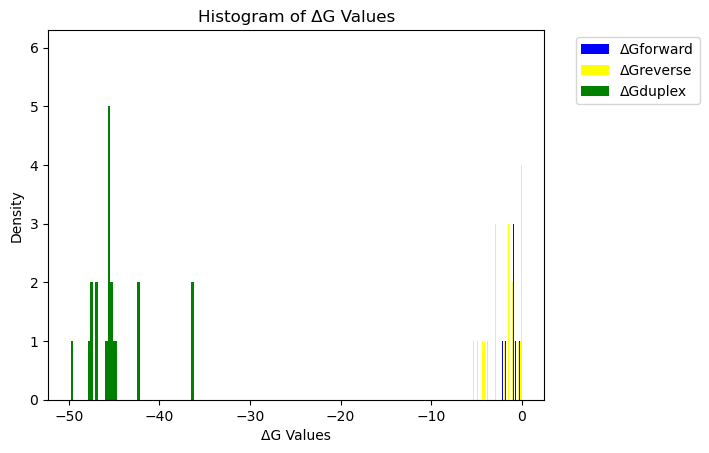

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(error_free_data[['ΔGforward']][0:20],label='ΔGforward',color='blue',bins=50)
plt.hist(error_free_data[['Δgreverse ']][0:20],label='ΔGreverse',color='yellow',bins=50)
plt.hist(error_free_data[['Δgduplex']][0:20],label='ΔGduplex',color='green',bins=50)

# # plt.hist(data[['ΔGforward']][0:20],label='ΔGreverse',color='yellow',bins=50)
# sns.kdeplot(data[['ΔGforward']][0:20],label='ΔGforward',color='blue',fill=True)
# sns.kdeplot(data[['ΔGduplex ']][0:20],label='ΔGduplex',color='green',fill=True)
# sns.kdeplot(data[['ΔGreverse ']][0:20],label='ΔGreverse',color='yellow',fill=True)

# sns.kdeplot(data[['ΔGduplex ']][0:20],label='ΔGduplex',color='green')
# sns.kdeplot(data[['ΔGreverse ']][0:20],label='ΔGreverse',color='blue')

# Add labels and a title
plt.xlabel('ΔG Values')
plt.ylabel('Density')
plt.title('Histogram of ΔG Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: ylabel='Density'>

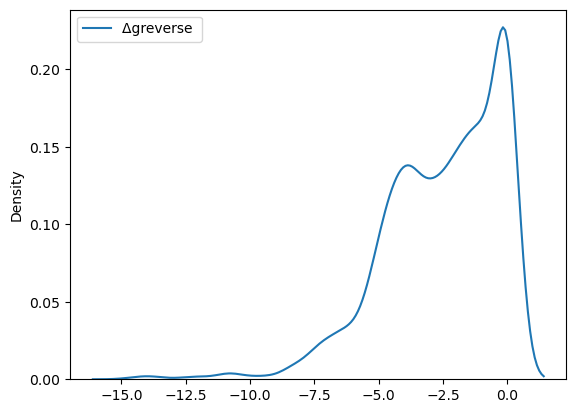

In [11]:
sns.kdeplot(error_free_data[['Δgreverse ']])

<Axes: ylabel='Density'>

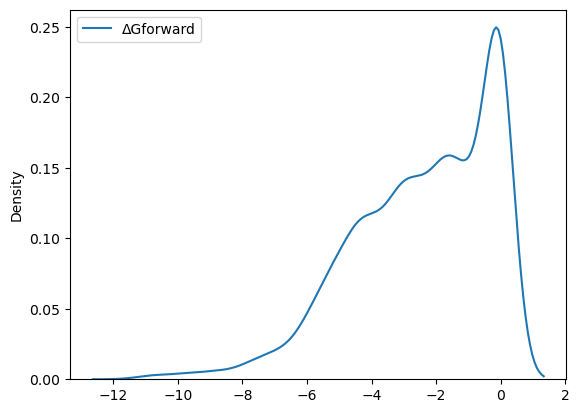

In [12]:
sns.kdeplot(error_free_data[['ΔGforward']])

Text(0.5, 0, 'Energy kCal/mol')

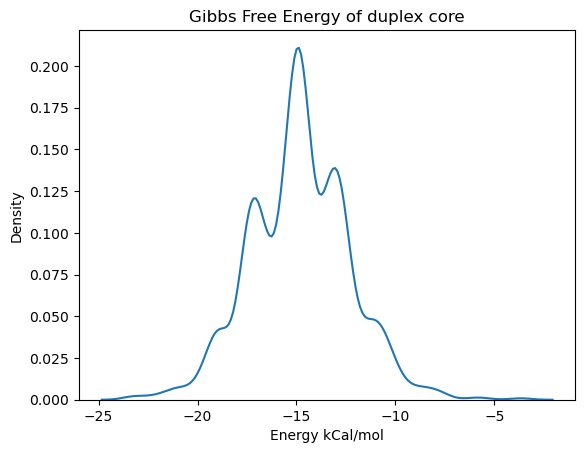

In [13]:
sns.kdeplot(error_free_data['Δgmiddle'])
plt.title('Gibbs Free Energy of duplex core')
plt.xlabel('Energy kCal/mol')

Text(0.5, 0, 'Energy kCal/mol')

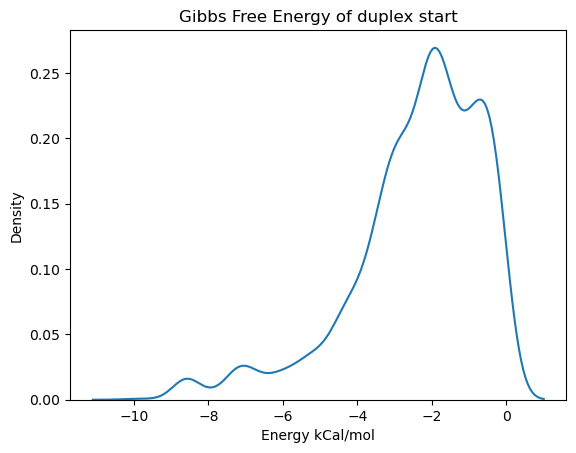

In [14]:
sns.kdeplot(error_free_data['Δganterior'])
plt.title('Gibbs Free Energy of duplex start')
plt.xlabel('Energy kCal/mol')

Text(0.5, 0, 'Energy kCal/mol')

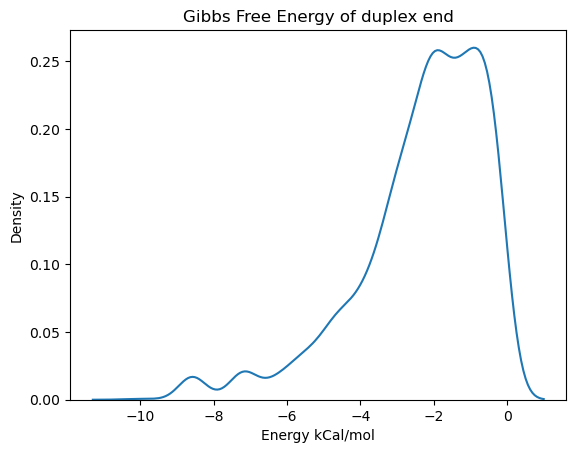

In [15]:
sns.kdeplot(error_free_data['Δgposterior'])
plt.title('Gibbs Free Energy of duplex end')
plt.xlabel('Energy kCal/mol')

<Axes: ylabel='Density'>

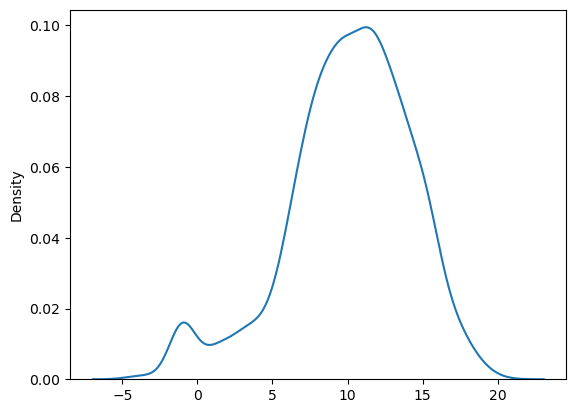

In [16]:
sns.kdeplot(abs(error_free_data['Δgmiddle'])-(abs(error_free_data['Δgposterior'])+abs(error_free_data['Δganterior'])))

[2.91887758]


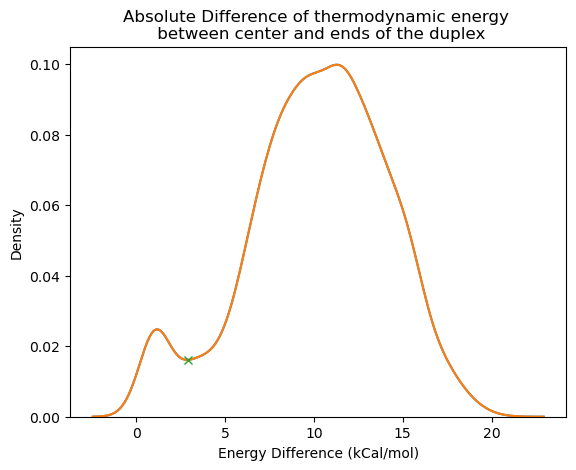

In [17]:
from scipy.signal import find_peaks
kde = sns.kdeplot(pd.to_numeric(error_free_data['Duplex-end']))
lines = kde.get_lines()
x,y = lines[0].get_data()
valleys,_ = find_peaks(-y)
plt.plot(x,y)
plt.plot(x[valleys],y[valleys],"x")
print(x[valleys])
plt.title('Absolute Difference of thermodynamic energy \n between center and ends of the duplex')
plt.xlabel('Energy Difference (kCal/mol)')
plt.show()


##### Filter sequences with following criteria:
##### 1. atleast one of the strands have no secondary structure forming
##### 2. the absolute energy difference of duplex_core and duple_ends is less than 2.9 as found above plot

In [18]:
filtered_data = error_free_data[(error_free_data['ΔGforward']==0)|(error_free_data['Δgreverse ']==0)]
filtered_data = filtered_data[(pd.to_numeric(error_free_data['Duplex-end'])<=7)]

/tmp/ipykernel_601594/2884633247.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[(pd.to_numeric(error_free_data['Duplex-end'])<=7)]


In [19]:
filtered_data.shape

(243, 18)

In [20]:
filtered_data

,Forward_strand,Reverse_strand,gc_percent,chr_id,gene_A,gene_B,coexpression_score,confidence_class,overlap_length,Forward_strand_sec_struc,ΔGforward,Reverse_strand_sec_struc,Δgreverse,Δgduplex,Δganterior,Δgmiddle,Δgposterior,Duplex-end
16,ACTCACTCTTCTTTTTTCTTCTAG,CTAGAAGAAAAAAGAAGAGTGAGT,33.333333,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,........................,0.0,-36.2,-0.3,-7.4,-0.4,6.7
157,ACAGCCTCTCACTCTTTCACCTAG,CTAGGTGAAAGAGTGAGAGGCTGT,50.000000,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,...........(((.....)))..,-0.7,-45.7,-3.5,-12.6,-2.6,6.5
158,CAGCCTCTCACTCTTTCACCTAGA,TCTAGGTGAAAGAGTGAGAGGCTG,50.000000,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,............(((.....))).,-0.7,-45.9,-3.6,-12.9,-3.0,6.3
217,ACCTCCCAGACTCAAGTGATCCTT,AAGGATCACTTGAGTCTGGGAGGT,50.000000,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,.(((.((....)).))).......,-0.6,-46.4,-2.9,-13.4,-3.6,6.9
219,CTCCCAGACTCAAGTGATCCTTCC,GGAAGGATCACTTGAGTCTGGGAG,54.166667,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,...(((.((....)).))).....,-0.6,-47.6,-3.1,-13.4,-4.4,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6567,AAGTGCTGGGATTATAGGTGTAAG,CTTACACCTATAATCCCAGCACTT,41.666667,chr15,Q9BXS6,O43482,0.871,HIGH,11797,.....(((......))).......,-0.1,........................,0.0,-41.2,-1.5,-12.7,-4.4,6.8
7026,GACTCCCCGATTCCCTGCCCCATC,GATGGGGCAGGGAATCGGGGAGTC,37.500000,chr15,Q9BXS6,O43482,0.871,HIGH,11797,........................,0.0,(((..........)))........,-0.2,-53.8,-4.1,-15.9,-5.7,6.1
7028,CTCCCCGATTCCCTGCCCCATCCC,GGGATGGGGCAGGGAATCGGGGAG,45.833333,chr15,Q9BXS6,O43482,0.871,HIGH,11797,........................,0.0,..(((..........)))......,-0.1,-55.8,-6.0,-17.3,-5.2,6.1
7029,TCCCCGATTCCCTGCCCCATCCCC,GGGGATGGGGCAGGGAATCGGGGA,50.000000,chr15,Q9BXS6,O43482,0.871,HIGH,11797,........................,0.0,...(((..........))).....,-0.1,-56.5,-10.0,-19.6,-8.3,1.3


In [3]:
import pandas as pd
pd.read_csv('with_high_confidence_score_gc_sequences_3.csv')

,Forward_strand,Reverse_strand,gc_percent,chr_id,gene_A,gene_B,coexpression_score,confidence_class,overlap_length,Forward_strand_sec_struc,ΔGforward,Reverse_strand_sec_struc,Δgreverse,Δgduplex,Δganterior,Δgmiddle,Δgposterior,Duplex-end
0,TGTAACTATCCACTTCTCTCCATC,GATGGAGAGAAGTGGATAGTTACA,33.333333,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,........................,0.0,-41.9,error,-13.5,error,#VALUE!
1,GTAACTATCCACTTCTCTCCATCT,AGATGGAGAGAAGTGGATAGTTAC,33.333333,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,........................,0.0,-41.9,error,-15.3,error,#VALUE!
2,TAACTATCCACTTCTCTCCATCTC,GAGATGGAGAGAAGTGGATAGTTA,37.500000,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,........................,0.0,-42.1,-0.5,-15.0,error,#VALUE!
3,AACTATCCACTTCTCTCCATCTCT,AGAGATGGAGAGAAGTGGATAGTT,37.500000,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,........................,0.0,-42.4,-0.2,-14.6,-0.9,13.5
4,ACTATCCACTTCTCTCCATCTCTT,AAGAGATGGAGAGAAGTGGATAGT,37.500000,chr17,J3QQL0,F5H1T4,0.778,HIGH,8678,........................,0.0,........................,0.0,-42.4,-0.1,-15.3,-1.3,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050,GCCCCCAGCCCTGCGGGGCCGAGC,GCTCGGCCCCGCAGGGCTGGGGGC,50.000000,chr15,Q9BXS6,O43482,0.871,HIGH,11797,(((((((....)).))))).....,-10.6,.((((((((....))))))))...,-13.9,-63.6,-3.7,-22.5,-4.2,14.6
7051,CCCCCAGCCCTGCGGGGCCGAGCG,CGCTCGGCCCCGCAGGGCTGGGGG,45.833333,chr15,Q9BXS6,O43482,0.871,HIGH,11797,.((((.((...)))))).......,-7.2,(.((((((((....)))))))).),-14.7,-62.6,-1,-22.4,-4.4,17
7052,CCCCAGCCCTGCGGGGCCGAGCGG,CCGCTCGGCCCCGCAGGGCTGGGG,41.666667,chr15,Q9BXS6,O43482,0.871,HIGH,11797,((((.((((....)))).).).)),-7.2,...((((((((....)))))))).,-13.9,-62.6,-1.8,-22.5,-5.8,14.9
7053,CCCAGCCCTGCGGGGCCGAGCGGC,GCCGCTCGGCCCCGCAGGGCTGGG,37.500000,chr15,Q9BXS6,O43482,0.871,HIGH,11797,(((.((...)))))(((....))),-7.1,....((((((((....)))))))),-12.7,-62.7,-2.6,-22.5,-4.2,15.7
